In [1]:
import pandas as pd
import seaborn as sns
import wordcloud
import matplotlib.pyplot as plt
sns.set_context("notebook")

In [2]:
data = pd.read_csv("clean_data.csv").drop(columns=["Unnamed: 0"])
df = data.copy()

In [3]:
print("Data shape: ",df.shape)
df.head()

Data shape:  (11799, 17)


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,data_title,new_title,min_salary,max_salary,loc_state
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),Data Analyst,Integration Engineer,37,66,NY
1,Quality Data Analyst,$37K-$66K,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),Data Analyst,Quality Analyst,37,66,NY
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,Data Analyst,Analyst Healthcare,37,66,NY
3,Data Analyst,$37K-$66K,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),Data Analyst,Data Analyst,37,66,NY
4,Reporting Data Analyst,$37K-$66K,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),Data Analyst,Reporting Analyst,37,66,NY


## Sectors

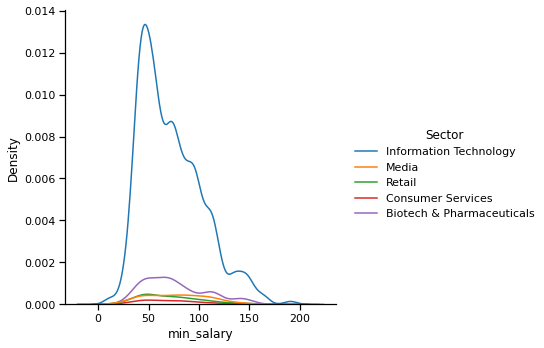

In [4]:
top_sectors = df.groupby("Sector")[['max_salary','min_salary']].mean().sort_values(['max_salary','min_salary'],ascending=False).head(5)
top_industry = df.groupby("Industry")[['max_salary','min_salary']].mean().sort_values(['max_salary','min_salary'],ascending=False).head(5)

sns.displot(df[df["Sector"].isin(top_sectors.index)],x="min_salary",kind="kde",hue="Sector")

### We can see that the IT sector has a much higher presence in the data. We also see that IT sector tends more higher minimum salaries than other sectors.
### Most minimum salaries are close to $40K-$60k.

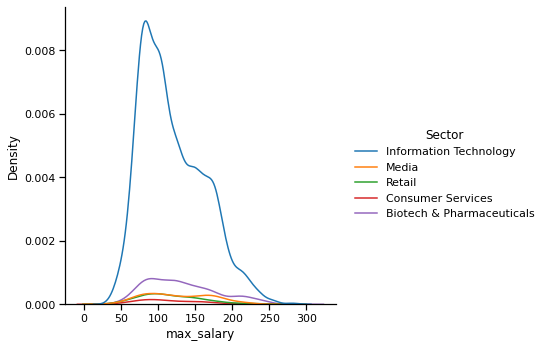

In [7]:
sns.displot(df[df["Sector"].isin(top_sectors.index)],x="max_salary",kind="kde",hue="Sector")

### Slightly more variation in the maximum salary. IT again has the highest possible salaries and they are more frequent

## Industries

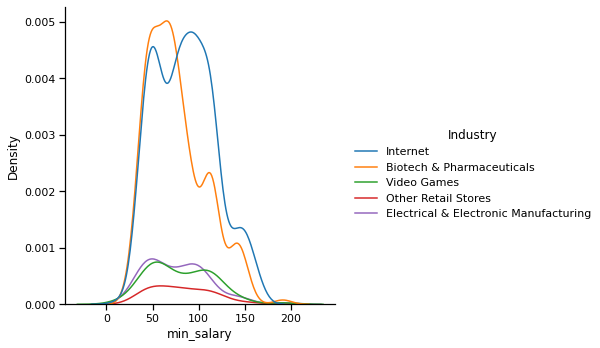

In [8]:
sns.displot(df[df["Industry"].isin(top_industry.index)],x="min_salary",kind="kde",hue="Industry")

### The Internet industry has more higher paying jobs than other industries. Biotech has some extremely well paying jobs compared to others

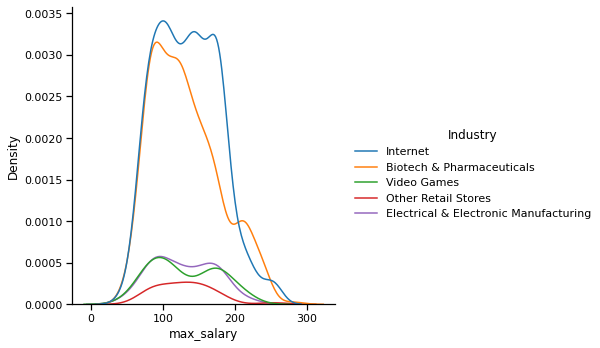

In [9]:
sns.displot(df[df["Industry"].isin(top_industry.index)],x="max_salary",kind="kde",hue="Industry")

### Interesting variations in the distributions of maximum salaries between industries. The internet industry a quite wide distribution. Video game and EEM industries have some bimodality in their distributions.

## Salary distributions over all features

Mean Minimum Salary:  68.12924824137639
Mean Maximum Salary:  113.6786168319349


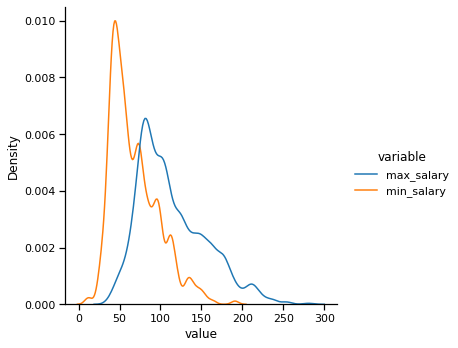

In [10]:
sns.displot(pd.melt(df[['max_salary','min_salary']]),x='value',hue='variable',kind="kde")
print("Mean Minimum Salary: ",df["min_salary"].mean())
print("Mean Maximum Salary: ",df["max_salary"].mean())


### The salaries seem to be quite nicely distributed. Both are almost normal with some skewness.

### Let us now see how the location and the size of the company affect the salary

In [11]:
def plot_salary_dist(df,dim,min_or_max):
    curr = df.groupby(dim)[['max_salary','min_salary']].mean().sort_values(['max_salary','min_salary'],ascending=False)
    top_curr = curr.head(5)
    tail_curr = curr.tail(5)
    curr_list = top_curr.append(tail_curr).index.tolist()
    sns.displot(df[df[dim].isin(curr_list)],x=min_or_max,kind="kde",hue=dim)
    return 0

C:\Users\johma\miniconda3\envs\gen_ml_env\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


0

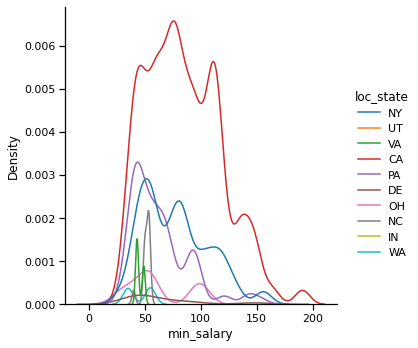

In [12]:
plot_salary_dist(df,dim="loc_state",min_or_max="min_salary")

### The lowest paying states have so few data points that they cannot be plotted. The minimum salaries are quite different for each states. This is expected as there is quite big difference in tech-hubs in USA, CA being the top spot for salaries

## Size of the company

0

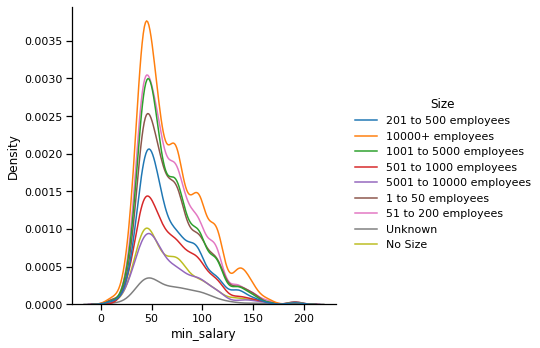

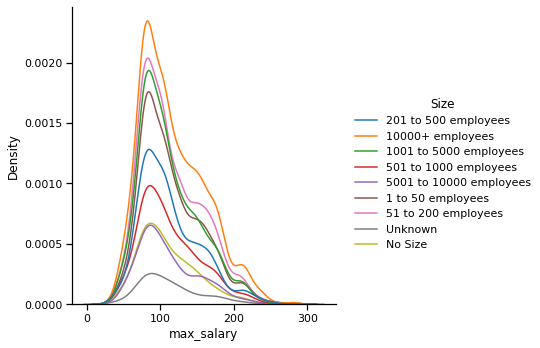

In [13]:
plot_salary_dist(df,dim="Size",min_or_max="min_salary")
plot_salary_dist(df,dim="Size",min_or_max="max_salary")

### The minimum and maximum salaries do seem to follow the same distribution. What is interesting is that companies with 5-10k employees do not compensate their employess the as well as other size companies. Though, the distributions are almost identical between all the categories, just shifted in frequency

### Let us look at the target variable, which we determine to be the minimum salary

<AxesSubplot:xlabel='min_salary', ylabel='Count'>

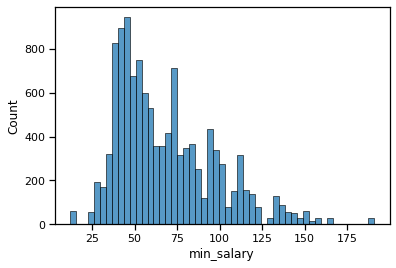

In [14]:
sns.histplot(df,x="min_salary")

### There are lots of unique values in the minimum salary target. This might become a problem when trying to predict with a dataset such as ours, having lots of missing values already and high cardinality in some features.

<AxesSubplot:xlabel='min_salary', ylabel='Count'>

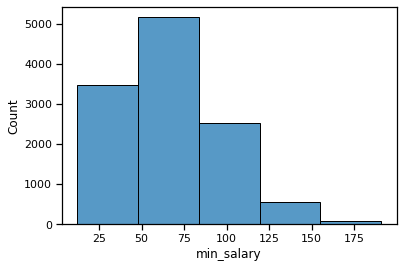

In [16]:
sns.histplot(df,x="min_salary",bins=5)

### Binning the minimum salaries together can create a better model. Salary as a concept is also a good feature to do binning on, as the finalized salary an employee gets is usually given from a range and it matches their skill level and job responsibilities. Though, with 3 bins, there is some imbalance still and we might have to for example upsample the less frequent categories.

### We should test building a classifier and a regressor model for our use case.

### Finally, we can see what words are used in the job descriptions often using a wordcloud. This is more of an interest of mine, as we are probably not going to use that feature in future analyses and predictions.

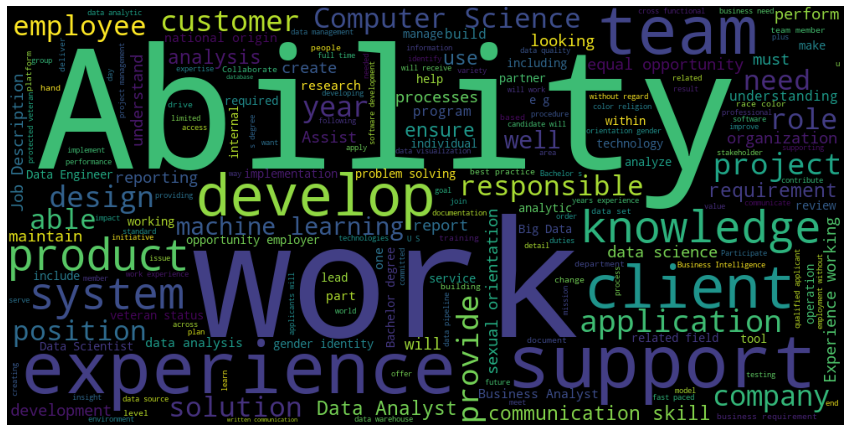

In [17]:
import wordcloud
import matplotlib.pyplot as plt

unique_string=(" ").join(df["Job Description"])
wordcloud = wordcloud.WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### As we can see, the technical jargon is quite prevalent. This is not a bad thing, as we are looking at data-related jobs and these keywords do give more context on the job opportunity